In [1]:
pip install nilearn


Note: you may need to restart the kernel to use updated packages.


In [5]:
from nilearn import datasets
import numpy as np

# Download the AAL atlas
aal_atlas = datasets.fetch_atlas_aal(version='SPM12', verbose=1)

# Access the atlas data and labels
atlas_filename = aal_atlas.maps
labels_filename = aal_atlas.labels

# Load the atlas data and labels
# Perform any further operations as needed
# Load the labels
labels = np.recfromcsv(labels_filename, delimiter='\t')

# Print the labels
print(labels)


[(b'Precentral_R',) (b'Frontal_Sup_L',) (b'Frontal_Sup_R',)
 (b'Frontal_Sup_Orb_L',) (b'Frontal_Sup_Orb_R',) (b'Frontal_Mid_L',)
 (b'Frontal_Mid_R',) (b'Frontal_Mid_Orb_L',) (b'Frontal_Mid_Orb_R',)
 (b'Frontal_Inf_Oper_L',) (b'Frontal_Inf_Oper_R',) (b'Frontal_Inf_Tri_L',)
 (b'Frontal_Inf_Tri_R',) (b'Frontal_Inf_Orb_L',) (b'Frontal_Inf_Orb_R',)
 (b'Rolandic_Oper_L',) (b'Rolandic_Oper_R',) (b'Supp_Motor_Area_L',)
 (b'Supp_Motor_Area_R',) (b'Olfactory_L',) (b'Olfactory_R',)
 (b'Frontal_Sup_Medial_L',) (b'Frontal_Sup_Medial_R',)
 (b'Frontal_Med_Orb_L',) (b'Frontal_Med_Orb_R',) (b'Rectus_L',)
 (b'Rectus_R',) (b'Insula_L',) (b'Insula_R',) (b'Cingulum_Ant_L',)
 (b'Cingulum_Ant_R',) (b'Cingulum_Mid_L',) (b'Cingulum_Mid_R',)
 (b'Cingulum_Post_L',) (b'Cingulum_Post_R',) (b'Hippocampus_L',)
 (b'Hippocampus_R',) (b'ParaHippocampal_L',) (b'ParaHippocampal_R',)
 (b'Amygdala_L',) (b'Amygdala_R',) (b'Calcarine_L',) (b'Calcarine_R',)
 (b'Cuneus_L',) (b'Cuneus_R',) (b'Lingual_L',) (b'Lingual_R',)
 (b'Oc

/home/rubycheng/miniconda3/lib/python3.10/site-packages/numpy/lib/npyio.py:2520: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [6]:
from nilearn import input_data, image

# Specify the file paths of the functional and labels (atlas) images
func_file = '/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
print(func_file)

# Load the functional image
func_img = image.load_img(func_file)


/home/rubycheng/miniconda3/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


In [20]:
import glob
from nilearn import input_data, image

# Specify the base directory path where the files are located
base_directory = '/mnt/e/fmriprep/'

# Specify the pattern of the file names for the functional images
func_pattern = 'sub-*'

# Find all subdirectories that match the pattern
sub_dirs = glob.glob(base_directory + func_pattern)

# Extract the subject numbers from the subdirectory paths
subject_numbers = [sub_dir.split('-')[1] for sub_dir in sub_dirs]

# Loop over the subject numbers and process the files
for subject in subject_numbers:
    # Construct the file path using the subject number
    func_file = base_directory + f'sub-{subject}/func/sub-{subject}_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    
    # Load the functional image
    func_img = image.load_img(func_file)
    
    # Process the image as needed
    # ...

    # Print the subject number and file path as an example
    print(f"Subject: {subject}, File: {func_file}")


Subject: 002, File: /mnt/e/fmriprep/sub-002/func/sub-002_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


ValueError: File not found: '/mnt/e/fmriprep/sub-002.html/func/sub-002.html_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

# Define ROIs using pain matrix
For pain matrix, I focus on six regions: the thalamus, insular cortex (IC), primary and secondary somatosensory cortices (SI and SII), anterior cingulate cortex (ACC), and prefrontal cortex (PFC) (Morton et al., 2016).

In [ ]:
# Access the label values and region names
labels = aal_atlas.labels
for i, region in enumerate(labels):
    print("Label:", i + 1, "Region:", region)

Label: 1 Region: Precentral_L
Label: 2 Region: Precentral_R
Label: 3 Region: Frontal_Sup_L
Label: 4 Region: Frontal_Sup_R
Label: 5 Region: Frontal_Sup_Orb_L
Label: 6 Region: Frontal_Sup_Orb_R
Label: 7 Region: Frontal_Mid_L
Label: 8 Region: Frontal_Mid_R
Label: 9 Region: Frontal_Mid_Orb_L
Label: 10 Region: Frontal_Mid_Orb_R
Label: 11 Region: Frontal_Inf_Oper_L
Label: 12 Region: Frontal_Inf_Oper_R
Label: 13 Region: Frontal_Inf_Tri_L
Label: 14 Region: Frontal_Inf_Tri_R
Label: 15 Region: Frontal_Inf_Orb_L
Label: 16 Region: Frontal_Inf_Orb_R
Label: 17 Region: Rolandic_Oper_L
Label: 18 Region: Rolandic_Oper_R
Label: 19 Region: Supp_Motor_Area_L
Label: 20 Region: Supp_Motor_Area_R
Label: 21 Region: Olfactory_L
Label: 22 Region: Olfactory_R
Label: 23 Region: Frontal_Sup_Medial_L
Label: 24 Region: Frontal_Sup_Medial_R
Label: 25 Region: Frontal_Med_Orb_L
Label: 26 Region: Frontal_Med_Orb_R
Label: 27 Region: Rectus_L
Label: 28 Region: Rectus_R
Label: 29 Region: Insula_L
Label: 30 Region: Insula_R

In [ ]:
# Find regions that start with "Fron" and retrieve their label numbers
target_prefix = "Postcen"
regions = []
numbers = []
for i, region in enumerate(aal_atlas.labels):
    if region.startswith(target_prefix):
        numbers.append(i + 1)
        regions.append(region)

if regions:
    for region, number in zip(regions, numbers):
        print(f"Region: {region}, Label number: {number}")
else:
    print(f"No regions found starting with '{target_prefix}'.")


Region: Postcentral_L, Label number: 57
Region: Postcentral_R, Label number: 58


Region: Thalamus_L, Label number: 77 <br>
Region: Thalamus_R, Label number: 78 <br>
Region: Insula_L, Label number: 29 <br>
Region: Insula_R, Label number: 30 <br>
Region: Cingulum_Ant_L, Label number: 31 <br>
Region: Cingulum_Ant_R, Label number: 32 <br>
Region: Frontal_Inf_Tri_L, Label number: 13 <br>
Region: Frontal_Inf_Tri_R, Label number: 14 <br>
Region: Precentral_L, Label number: 1 <br>
Region: Precentral_R, Label number: 2 <br>
Region: Postcentral_L, Label number: 57 <br>
Region: Postcentral_R, Label number: 58

In [ ]:
from nilearn import input_data, image

# Define the target region labels as a list
target_labels = [1,2,13,14,29,30,31,32,57,58,77,78]  # Replace with your desired label numbers

# Filter the AAL atlas labels using the target labels
target_regions = [region for region in aal_atlas.labels if any(str(label) in region for label in target_labels)]

# Create a masker for the target regions
masker = input_data.NiftiLabelsMasker(labels_img=aal_atlas.maps, labels=target_regions, detrend=True, standardize=True, smoothing_fwhm=6.0, high_pass=0.01, low_pass=0.1, t_r=2.0)

# Apply the masker to the functional image
time_series = masker.fit_transform(func_img)

# The resulting time series will contain data only for the target regions
print(time_series.shape)


(300, 116)


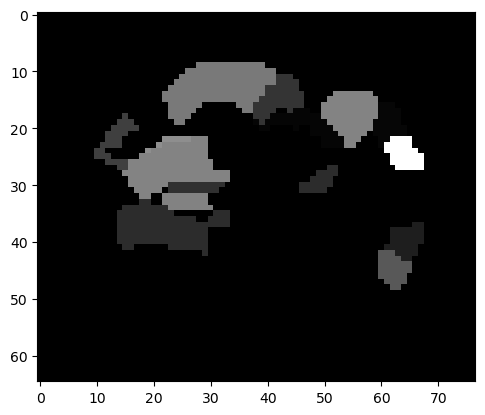

In [ ]:
import matplotlib.pyplot as plt

thresholded_masked_data = time_series * (time_series > time_series.mean()) 
#This effectively thresholds the data to remove any low-amplitude noise.

thresholded_img = masker.inverse_transform(thresholded_masked_data)
#(thresholded_masked_data is a 2D numpy array of the fMRI data after applying a threshold to it. The masker.inverse_transform method is then used to convert the thresholded data into a 3D Nifti image object, where each voxel in the image has the same value as its corresponding voxel in thresholded_masked_data.)

plt.imshow(thresholded_img.get_fdata()[:,:,25,0], cmap='gray')

In [ ]:
import pandas as pd

# Specify the path(s) of the confound file(s)
confound_files = '/mnt/e/fmriprep/sub-002/func/sub-002_task-rest_desc-confounds_timeseries.tsv'

# Specify the columns you want to select
selected_columns = ['dvars', 'framewise_displacement', 'trans_x','trans_y','trans_z', 'rot_x', 'rot_y', 'rot_z']  # Replace with the names of the columns you want to select

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(confound_files, delimiter='\t')

# Select only the specified columns
selected_df = df[selected_columns]

# Now `selected_df` contains the DataFrame with only the selected columns
print(selected_df.head())  # Print the first few rows of the selected DataFrame


       dvars  framewise_displacement   trans_x   trans_y   trans_z     rot_x  \
0        NaN                     NaN -0.030209 -0.042646 -0.060922  0.000203   
1  27.229527                0.067177 -0.030247 -0.006518 -0.068794  0.000327   
2  23.595106                0.080535 -0.028200 -0.034991 -0.048727  0.000158   
3  29.169474                0.052365 -0.030210 -0.007842 -0.051131  0.000229   
4  28.552750                0.064280 -0.030240 -0.027970 -0.057058  0.000054   

      rot_y     rot_z  
0  0.000562  0.000526  
1  0.000224  0.000526  
2  0.000398  0.000271  
3  0.000625  0.000389  
4  0.000181  0.000244  


In [ ]:
# Apply the masker to the functional image
time_series = masker.fit_transform(func_img, confounds=confound_files)

# The resulting time series is a 2D array with shape (n_samples, n_regions)
print(time_series.shape)

ValueError: array must not contain infs or NaNs